In [1]:
import numpy
import random

from matplotlib import pyplot
from tqdm.auto import tqdm, trange

import sys
sys.path.insert(0, "experiments")
from datasets import get_dataset
from utils import change_figax_color

In [3]:
PATHS = {
    "STED" : "/home-local2/projects/FLCDataset/20240718-dataset-full-images.tar",
    "STED-250k" : "/home-local2/projects/FLCDataset/dataset-250k.tar",
    "JUMP" : "/home-local2/projects/SSL/ssl-data/jump.tar",
    "SIM" : "/home-local2/projects/FLCDataset/sim-dataset-full-images.tar",
    "HPA" : "/home-local2/projects/SSL/ssl-data/hpa.zip",
    "optim" : None,
}

In [4]:
KEY = "optim"
dataset = get_dataset("STED" if "STED" in KEY else KEY, PATHS[KEY])

In [5]:
print("Number of images: ", len(dataset))
# shapes = [dataset.get_data(i)["image"].shape for i in trange(len(dataset))]
# shapes = numpy.array(shapes)

# Computes how many crops of size (size, size) can be extracted from an image of size (h, w)
def compute_crops(h, w, size):
    count = 0
    for j in range(0, h, size):
        for i in range(0, w, size):
            count += 1
    return count
# print("Number of crops (approx): ", sum([compute_crops(h, w, 224) for h, w in shapes]))


Number of images:  438


NameError: name 'shapes' is not defined

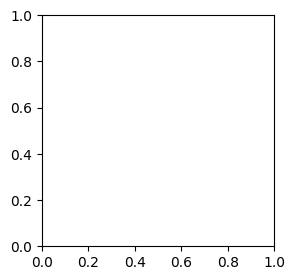

In [6]:
fig, ax = pyplot.subplots(figsize=(3,3))
ax.scatter(shapes[:, 1], shapes[:, 0], s=1, color="silver")
ax.set(
    xlabel="Width (px)",
    ylabel="Height (px)",
    aspect="equal",
)
change_figax_color(fig)
pyplot.show()


In [46]:
from collections import defaultdict
indices_per_class = defaultdict(list)
for i in trange(len(dataset)):
    data = dataset.get_data(i)
    if "metadata" in data:
        metadata = data["metadata"].item()
        indices_per_class[metadata["protein-id"]].append(i)
print(indices_per_class.keys())

  0%|          | 0/238683 [00:00<?, ?it/s]

dict_keys(['beta2-spectrin', 'vimentin', 'gephyrin', 'map2', 'vgat', 'bassoon', 'psd95', 'vglut2', 'vglut1', 'glur1', 'beta-camkii', 'f-actin', 'camkii', 'lifeact', 'tubulin', 'sir-actin', 'live-tubulin', 'sir-tubulin', 'adducin', 'FUS', 'tom20', 'homer', 'nkcc2', 'rim'])


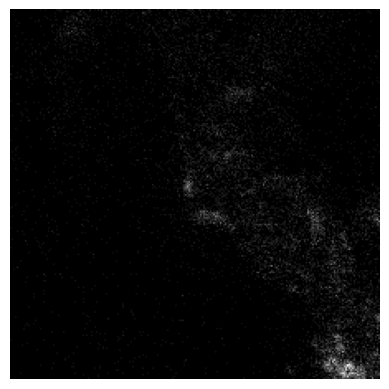

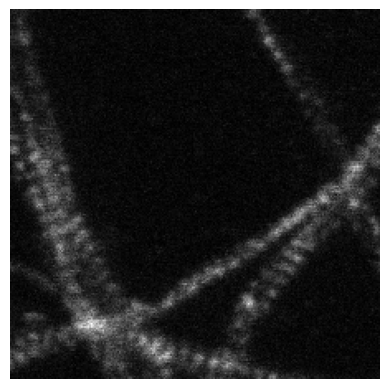

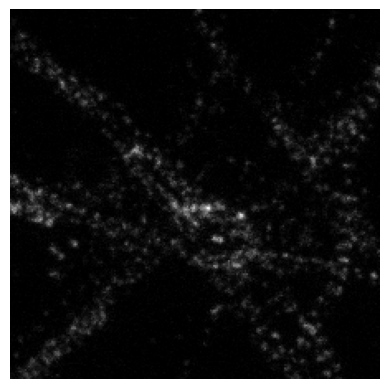

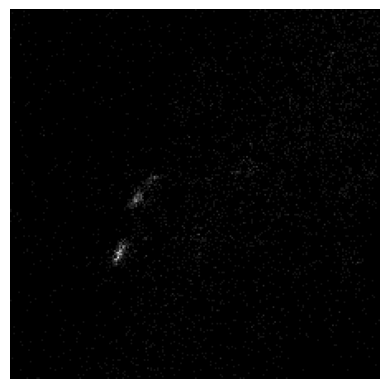

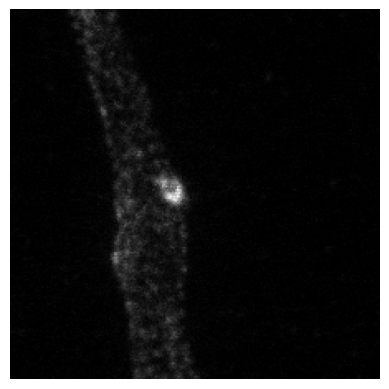

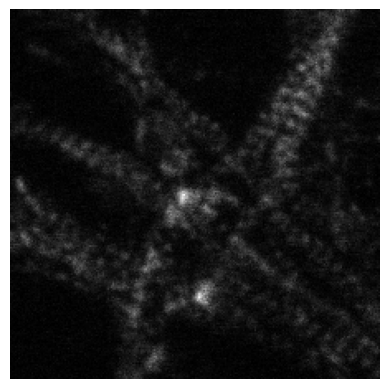

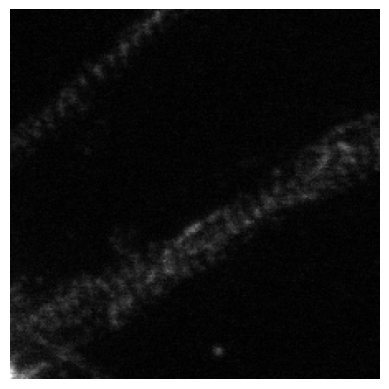

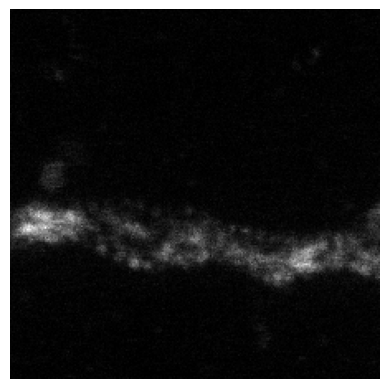

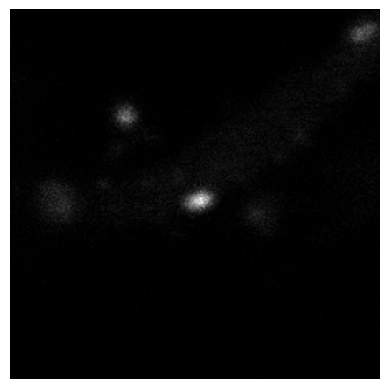

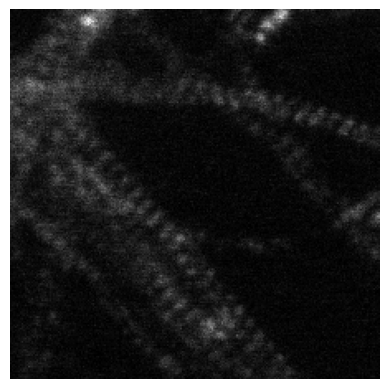

In [7]:
import tifffile
import os
from matplotlib_scalebar.scalebar import ScaleBar
random.seed(42)
for _ in range(10):
    idx = random.randint(0, len(dataset) - 1)
    if hasattr(dataset, "get_data"):
        data = dataset.get_data(idx)
        print(dataset.members[idx])
    else:
        image, metadata = dataset[idx]
        data = {"image" : image.cpu().numpy().squeeze() * 255.0}

    fig, ax = pyplot.subplots(frameon=False)

    protein_id = None
    if "metadata" in data:
        metadata = data["metadata"].item()
        if "msr-metadata" in metadata:
            scalebar = ScaleBar(metadata["msr-metadata"]["PhysicalSizeX"], metadata["msr-metadata"]["PhysicalSizeXUnit"], location="lower right", frameon=False, color="white", scale_loc="top")
            ax.add_artist(scalebar)
        if "protein-id" in metadata:
            protein_id = metadata["protein-id"]
    ax.imshow(data["image"], cmap="gray", vmin=0, vmax=255)
    ax.axis("off")

    os.makedirs(f"./examples/{KEY}", exist_ok=True)
    tifffile.imwrite(f"./examples/{KEY}/image_{idx}.tif", data["image"].astype(numpy.uint8))

    pyplot.show()